In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chemical_properties1515.csv contains the numerical values for chemical features
- todo: FIX NAMING

In [3]:
# dfCore = pd.read_csv('https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors.csv', usecols=[2,5,6] + list(range(10,218)), index_col=0)
# df1515 = pd.read_csv("Chemical_properties1515.csv")
# df1515 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv", usecols=[2,5,6] + list(range (10,218)), index_col=0)
# df1515_2 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv")
# dfID = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/Chemical_descriptors1515.csv")
df1515 = pd.read_csv("https://raw.githubusercontent.com/meidelien/Metabolic-network-layout-using-biochemical-coordinates/main/data/1515_for_PCA.csv")


In [4]:
import numpy as np

# df1515.replace(np.nan, 0) # fml

df1515["BCUT2D_MWHI"] = df1515["BCUT2D_MWHI"].replace(np.nan, 0)

df1515["BCUT2D_MWLOW"] = df1515["BCUT2D_MWLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGHI"] = df1515["BCUT2D_CHGHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPHI"] = df1515["BCUT2D_LOGPHI"].replace(np.nan, 0)

df1515["BCUT2D_LOGPLOW"] = df1515["BCUT2D_LOGPLOW"].replace(np.nan, 0)

df1515["BCUT2D_CHGLO"] = df1515["BCUT2D_CHGLO"].replace(np.nan, 0)

df1515["BCUT2D_MRHI"] = df1515["BCUT2D_MRHI"].replace(np.nan, 0)

df1515["BCUT2D_MRLOW"] = df1515["BCUT2D_MRLOW"].replace(np.nan, 0)

df1515["MaxPartialCharge"] = df1515["MaxPartialCharge"].replace(np.nan, 0)

df1515["MinPartialCharge"] = df1515["MinPartialCharge"].replace(np.nan, 0)

df1515["MaxAbsPartialCharge"] = df1515["MaxAbsPartialCharge"].replace(np.nan, 0)

df1515["MinAbsPartialCharge"] = df1515["MinAbsPartialCharge"].replace(np.nan, 0)

In [4]:
feature_list = (df1515.columns)

def listToString(feature_list): 
    
    str0 = " ;
    str1 = " " 
    str2 =  ", ;
    
    # return string  
    return (str0 + str1.join(feature_list) + str2)

print(listToString(feature_list))

SyntaxError: EOL while scanning string literal (Temp/ipykernel_25560/3466167364.py, line 5)

In [52]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import kaleido as kd
import os

import numpy as np


features = ['mass', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW',
       'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW',
       'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n',
       'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v',
       'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3',
       'LabuteASA', 'PEOE_VSA1', 'SMR_VSA1', 'SlogP_VSA2', 'SlogP_VSA3',
       'TPSA', 'FractionCSP3', 'HeavyAtomCount', 'NOCount', 'NumHAcceptors',
       'NumHeteroatoms', 'NumRotatableBonds', 'MolLogP', 'MolMR']

xx = df1515.loc[:,df1515.columns].values
xx = StandardScaler().fit_transform(df1515[features])
df = pd.DataFrame(xx, columns = features)
pca = PCA()

components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

# HOW MANY COMPONENTS to render
number_components = 5

fig = px.scatter_matrix(
    components,
    labels = labels,
    dimensions = range(number_components),  # Number of component, for the PCA set, linear behavior comes on component 5 and can give descriptive (~ 80 %)
    color = df1515["Name"],  # Legend on the right of the plot
    title = f"Principal component analysis for metabolites in the iML1515 GEM <br><sup>{number_components} components</sup>",
 
)

# centers title
fig.update_layout(title_x=0.5)


fig.update_traces(diagonal_visible=False)
fig.update_layout (
    width = 2560,
    height = 1600
)


# Changes the legend string
fig.update_layout( 
    legend=dict(
        title = "Metabolites", 
    )
)


# fig.add_annotation( # add a text callout with arrow
   # text= "big boi!", x="NADH", arrowhead=1, showarrow=True
# )

fig.show()

fig.write_html("PCA.html")

## For testing purposes: reading only the csv with RDKit numericals

In [ ]:
# df2 = pd.read_csv("chemical_properties.csv")
# xx = df.loc[:, df2.columns].values

xx = df1515.loc[:,df1515.columns].values

In [ ]:
xx = StandardScaler().fit_transform(xx)

In [ ]:
xx.shape

(962, 58)

In [ ]:
np.mean(xx)

-4.32978224529418e-18

In [ ]:
np.mean(xx), np.std(xx)

(-4.32978224529418e-18, 1.0)

In [ ]:
feat_cols = ["feature" +str(i) for i in range(xx.shape[1])]
feat_cols_name = [df1515.columns]

In [ ]:
normalized_descriptors = pd.DataFrame(xx, columns = feat_cols_name)

In [ ]:
# normalized_descriptors.tail()
#xx.shape[1]

print(df1515.columns)

# print(list)

NameError: name 'df1515' is not defined

In [ ]:
# 2 components 
pca_descriptors = PCA(n_components= 2)

# 4 component
# pca_descriptors = PCA(n_components= 4)

PC_descriptors = pca_descriptors.fit_transform(normalized_descriptors)

C:\Users\meide\.conda\envs\rdkit\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
pca_descriptors

PCA(n_components=2)

In [ ]:
# 2 Components
PC_df = pd.DataFrame(data= PC_descriptors, columns= ["PC1", "PC2"])

# 4 components
# principal_descriptors_df = pd.DataFrame(data= PC_descriptors, columns= ["PC1", "PC2", "PC3", "PC4"])

(-5.0, 5.0)

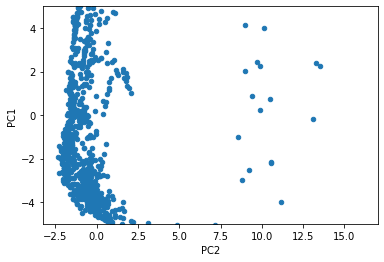

In [ ]:
#principal_descriptors_df.tail()
ax  = PC_df.plot.scatter(x = "PC2", y ="PC1")
ax.set_ylim(-5, 5)


In [ ]:
print("Explained variation per principal component: {}".format(pca_descriptors.explained_variance_))

Explained variation per principal component: [34.16290627  7.7769594 ]


In [ ]:
# a =  63.53175376 +  12.87115987 # + 10.33669742 + 9.44759513 #34.16290627 +  7.7769594
a = 34.16290627 + 7.7769594 +  2.92142128 + 2.40747469
a

47.26876164

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


x  = principal_descriptors_df["PC1"]
y  = principal_descriptors_df["PC2"]

plt.scatter(x[:1], x[:,2], c=y)


plt.show()

KeyError: 'key of type tuple not found and not a MultiIndex'

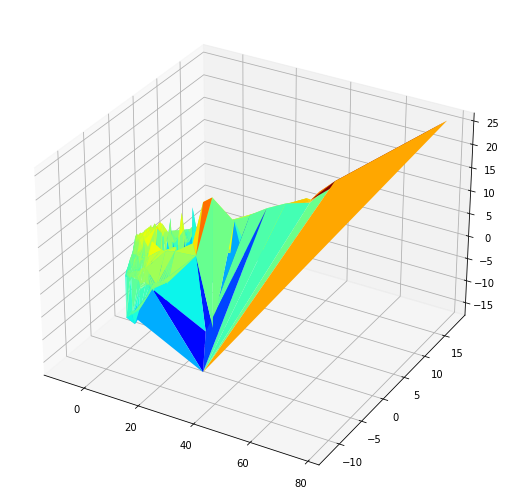

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import plotly
fig = plt.figure(figsize=(14, 9))
ax = plt.axes(projection="3d")

ax.plot_trisurf(principal_descriptors_df.PC1, principal_descriptors_df.PC2, principal_descriptors_df.PC3, cmap=cm.jet, linewidth=0.2,antialiased = True)
plt.show()

In [ ]:
principal_descriptors_df["ID"] = dfID["#ID"]

In [ ]:
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

x = dfPCA.values

# Scale large vals
x = StandardScaler().fit_transform(x)

pca_2 = PCA(n_components = 2)

X_r = pca_2.fit_transform(scale(x)).T

In [ ]:
import plotly.express as px

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np

print(df1515.columns)
# df = px.data.iris()
features = ['mass', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW',
       'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW',
       'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n',
       'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v',
       'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3',
       'LabuteASA', 'PEOE_VSA1', 'SMR_VSA1', 'SlogP_VSA2', 'SlogP_VSA3',
       'TPSA', 'FractionCSP3', 'HeavyAtomCount', 'NOCount', 'NumHAcceptors',
       'NumHeteroatoms', 'NumRotatableBonds', 'MolLogP', 'MolMR']

df1515 = StandardScaler().fit_transform(df1515[features])
pca = PCA()

components = pca.fit_transform(df1515[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df1515["Name"] # ["species"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
features = feat_cols_name
print(features)

[Index(['mass', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge', 'MinPartialCharge',
       'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW',
       'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW',
       'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n',
       'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v',
       'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3',
       'LabuteASA', 'PEOE_VSA1', 'SMR_VSA1', 'SlogP_VSA2', 'SlogP_VSA3',
       'TPSA', 'FractionCSP3', 'HeavyAtomCount', 'NOCount', 'NumHAcceptors',
       'NumHeteroatoms', 'NumRotatableBonds', 'MolLogP', 'MolMR'],
      dtype='object')]


In [ ]:
df1515["mass"]

name
H(+)                                     1.00794
NADH                                   663.11022
(2E)-geranyl diphosphate               311.04660
butanal                                 72.05751
(4R,5S)-dethiobiotin                   213.12447
                                         ...    
5-(2-hydroxyethyl)-4-methylthiazole    143.04048
5-dehydro-D-gluconate                  193.03538
arsenate                               139.91018
tetracycline                           444.15327
H2O                                     18.01056
Name: mass, Length: 962, dtype: float64